In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading dataset from CSV

sales_data = pd.read_csv(r"C:\Users\dell\Downloads\sales_data_with_customer.csv")
customer_data = pd.read_csv(r"C:\Users\dell\Downloads\customer_data.csv")
product_data = pd.read_csv(r"C:\Users\dell\Downloads\product_data.csv")
marketing_data = pd.read_csv(r"C:\Users\dell\Downloads\marketing_data.csv")

In [ ]:
# Merge Sales with Customers

sales_customers_df = pd.merge(sales_data, customer_data, on='Customer_ID', how='left')


In [ ]:
# Merge with Products

sales_customers_products_df = pd.merge(sales_customers_df, product_data, on='Product_ID', how='left')


In [ ]:
# show data types of each column
sales_customers_products_df.dtypes

Order_ID               int64
Product_ID             int64
Store_ID               int64
Channel               object
Date                  object
Quantity_Sold          int64
Unit_Price           float64
Discount             float64
Customer_ID            int64
Revenue              float64
Gender                object
Age                    int64
Location              object
Signup_Date           object
Preferred_Channel     object
Loyalty_Status        object
Category              object
Sub_Category          object
Brand                 object
Cost_Price           float64
Launch_Date           object
dtype: object

In [ ]:
# Convert date columns to datetime
sales_customers_products_df['Date'] = pd.to_datetime(sales_customers_products_df['Date'])
marketing_data['Start_Date'] = pd.to_datetime(marketing_data['Start_Date'])
marketing_data['End_Date'] = pd.to_datetime(marketing_data['End_Date'])

In [ ]:
#  Merge with marketing data on Channel and Category
merged = pd.merge(
    sales_customers_products_df,marketing_data,how='left',
    left_on=["Channel", "Category"],
    right_on=["Channel", "Targeted_Category"]
)

In [11]:
#  Filter rows where sale date is within campaign dates
df = merged[
    (merged['Date'] >= merged['Start_Date']) &
    (merged['Date'] <= merged['End_Date'])
]

In [ ]:
# show columns
df.columns

Index(['Order_ID', 'Product_ID', 'Store_ID', 'Channel', 'Date',
       'Quantity_Sold', 'Unit_Price', 'Discount', 'Customer_ID', 'Revenue',
       'Gender', 'Age', 'Location', 'Signup_Date', 'Preferred_Channel',
       'Loyalty_Status', 'Category', 'Sub_Category', 'Brand', 'Cost_Price',
       'Launch_Date', 'Campaign_ID', 'Start_Date', 'End_Date', 'Spend',
       'Targeted_Category', 'Revenue_Attributed'],
      dtype='object')

In [ ]:
# checking null values
df.isna().sum()

Order_ID              0
Product_ID            0
Store_ID              0
Channel               0
Date                  0
Quantity_Sold         0
Unit_Price            0
Discount              0
Customer_ID           0
Revenue               0
Gender                0
Age                   0
Location              0
Signup_Date           0
Preferred_Channel     0
Loyalty_Status        0
Category              0
Sub_Category          0
Brand                 0
Cost_Price            0
Launch_Date           0
Campaign_ID           0
Start_Date            0
End_Date              0
Spend                 0
Targeted_Category     0
Revenue_Attributed    0
dtype: int64

In [ ]:
# Drop diplicates
df = df.drop_duplicates()

In [ ]:
# Data type conversion

date_cols = ['Date', 'Launch_Date', 'Signup_Date', 'Start_Date', 'End_Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

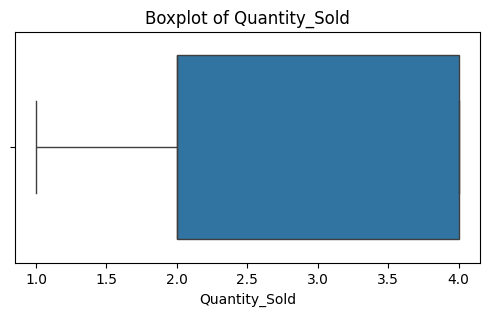

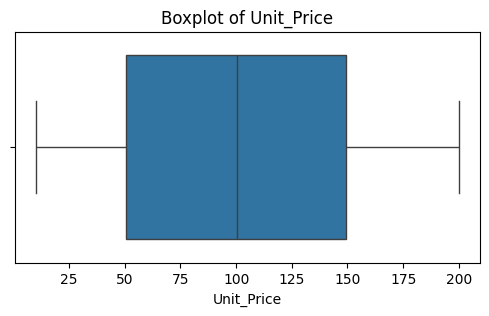

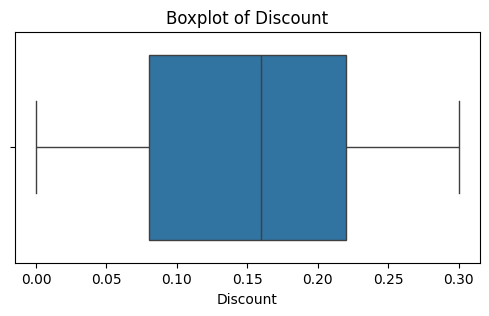

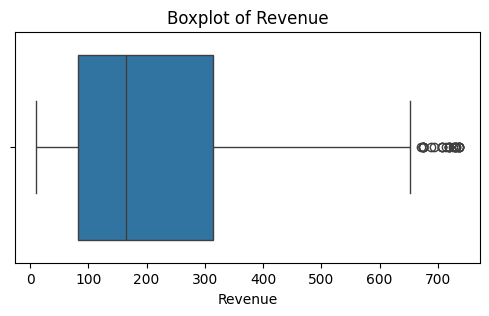

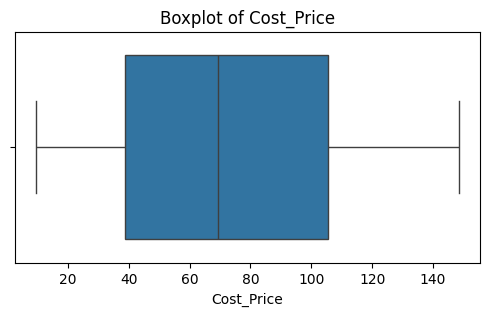

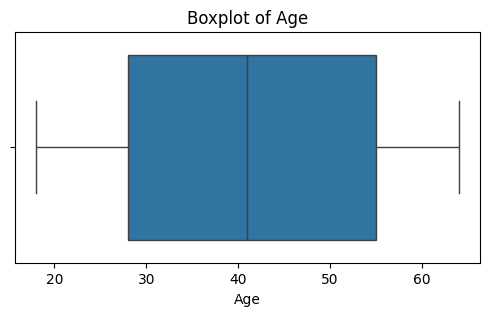

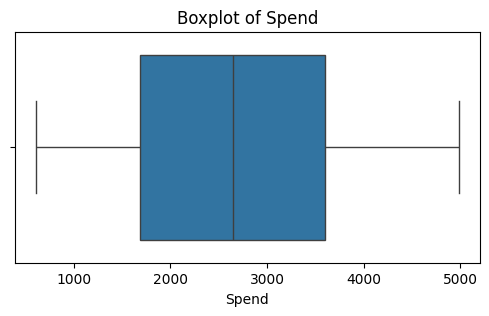

In [ ]:
# Visualizing outliers using a boxplot

import matplotlib.pyplot as plt
import seaborn as sns

cols_to_check = ['Quantity_Sold', 'Unit_Price', 'Discount', 'Revenue', 'Cost_Price', 'Age', 'Spend']

for col in cols_to_check:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [ ]:
# Counting outliers in each numeric column using IQR method

def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series < lower) | (series > upper)).sum()

for col in cols_to_check:
    count = count_outliers_iqr(df[col])
    print(f"{col}: {count} outliers")


Quantity_Sold: 0 outliers
Unit_Price: 0 outliers
Discount: 0 outliers
Revenue: 27 outliers
Cost_Price: 0 outliers
Age: 0 outliers
Spend: 0 outliers


In [ ]:
# Calculating profit

df['Profit'] = df['Revenue'] - (df['Quantity_Sold'] * df['Cost_Price'])

In [ ]:
# Categorizing customers into age groups

def age_group(age):
    if age < 25:
        return 'Young'
    elif age < 35:
        return 'Adult'
    elif age < 50:
        return 'Middle-aged'
    else:
        return 'Old-aged'
df['Customer_Age_Group'] = df['Age'].apply(age_group)


In [ ]:
# Identifying customers who switched their preferred channel

df['Channel_Switcher_Flag'] = (df['Channel'] != df['Preferred_Channel']).astype(int)


In [ ]:
#save result data to csv

df.to_csv("omni_retail_sales.csv",index=False)

In [ ]:
# show first 5 rows

df.head()

,Order_ID,Product_ID,Store_ID,Channel,Date,Quantity_Sold,Unit_Price,Discount,Customer_ID,Revenue,...,Launch_Date,Campaign_ID,Start_Date,End_Date,Spend,Targeted_Category,Revenue_Attributed,Profit,Customer_Age_Group,Channel_Switcher_Flag
1,10001,2034,17,Online,2023-05-21,1,80.18,0.12,3013,70.56,...,2022-06-23,5020,2023-01-21,2023-07-30,2472.34,Toys,7437.40,34.35,Young,1
2,10001,2034,17,Online,2023-05-21,1,80.18,0.12,3013,70.56,...,2022-06-23,5042,2023-01-23,2023-05-25,2108.81,Toys,8582.11,34.35,Young,1
3,10001,2034,17,Online,2023-05-21,1,80.18,0.12,3013,70.56,...,2022-06-23,5044,2023-05-09,2023-08-20,3392.61,Toys,8797.85,34.35,Young,1
8,10001,2034,17,Online,2023-05-21,1,80.18,0.12,3013,70.56,...,2022-06-23,5068,2023-02-10,2023-09-09,825.61,Toys,7988.38,34.35,Young,1
9,10001,2034,17,Online,2023-05-21,1,80.18,0.12,3013,70.56,...,2022-06-23,5077,2023-03-02,2023-06-17,1747.66,Toys,4743.91,34.35,Young,1
